In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

### Standardized Residuals

In [10]:
df1 = pd.read_excel('Icecream.xlsx')
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [11]:
Reg1 = ols(formula = "Sales ~ Student_Population", data = df1)
Fit1 = Reg1.fit()
Fit1.summary()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        08:16:51   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 60 + 5x
### R sqd: 0.903 i.e. 90.3 % of variabilty is explained with this regression model

In [12]:
anova_lm(Fit1)

,df,sum_sq,mean_sq,F,PR(>F)
Student_Population,1.0,14200.0,14200.00,74.248366,0.000025
Residual,8.0,1530.0,191.25,NaN,NaN


This is valid, 95% are within bound (between +2 and -2)<br>
Independent var: Student pop so dof = 1;<br>
#### <font color='red'> Error Term: Dof = 8 -> 10 - 1 - dof (Ind Var) = 8
Where 10 <- No of data Set<br><br>
    
P Val very low: Model is valid.

<AxesSubplot:xlabel='Student_Population', ylabel='Sales'>

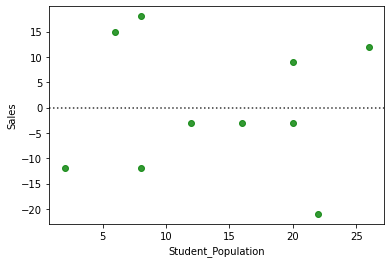

In [24]:
import seaborn as sns
sns.residplot(df1['Student_Population'], df1['Sales'], color = 'g')

y = Residual for sales

## Studentized Residual Plot

In [13]:
influence = Fit1.get_influence()
resid_student = influence.resid_studentized_external

In [14]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

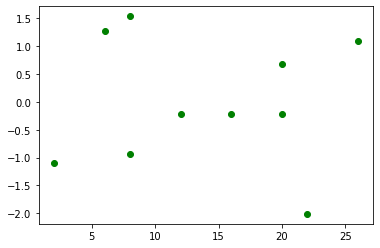

In [15]:
plt.figure()
plt.scatter(df1['Student_Population'], resid_student, color = "green")

95% of standardized residuals are between +2 and -2<br><br>
x = Student Pop <br>
y = Residual for sales

## Normality of Error Term

F:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


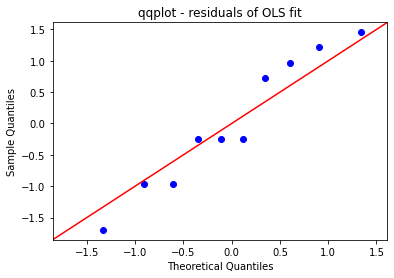

In [17]:
from scipy import stats
import statsmodels.api as sm
res = Fit1.resid
probplot = sm.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

#### Points are close to 45 degree, this means stadardized residuals are approximately normally distributes
x axis = normal scores
y = stdized residuals